# Tarea 2

$
    Martina Contreras \\
    Benjamin Opazo \\
    Noemí de la Peña \\
    Jeremías Martinez$

In [30]:
import numpy as np
import matplotlib.pyplot as plt


- Con la herramienta pyphox, se registran los datos de la aceleración de gravedad en todos los ejes, sin embargo, nosotros trabajaremos solo con la aceleración en el eje z, es decir, $a_z$, así importamos estos datos, en la siguientes líneas de código.

In [31]:
dato1 = np.genfromtxt("celular-mesa.csv", usecols= 3,skip_footer=52085 )
dato2 = np.genfromtxt("celular-mano.csv", usecols=3, skip_footer=11066)
dato3 = np.genfromtxt("celular-celular.csv", usecols=3, skip_footer=11037)

- Primero, eliminamos datos que pueden ser atribuidos a movimientos impartidos por nosotros. \
Para ello, graficamos el número de mediciones en función de los datos.

Text(0.5, 1.0, 'Medición de celular sobre celular')

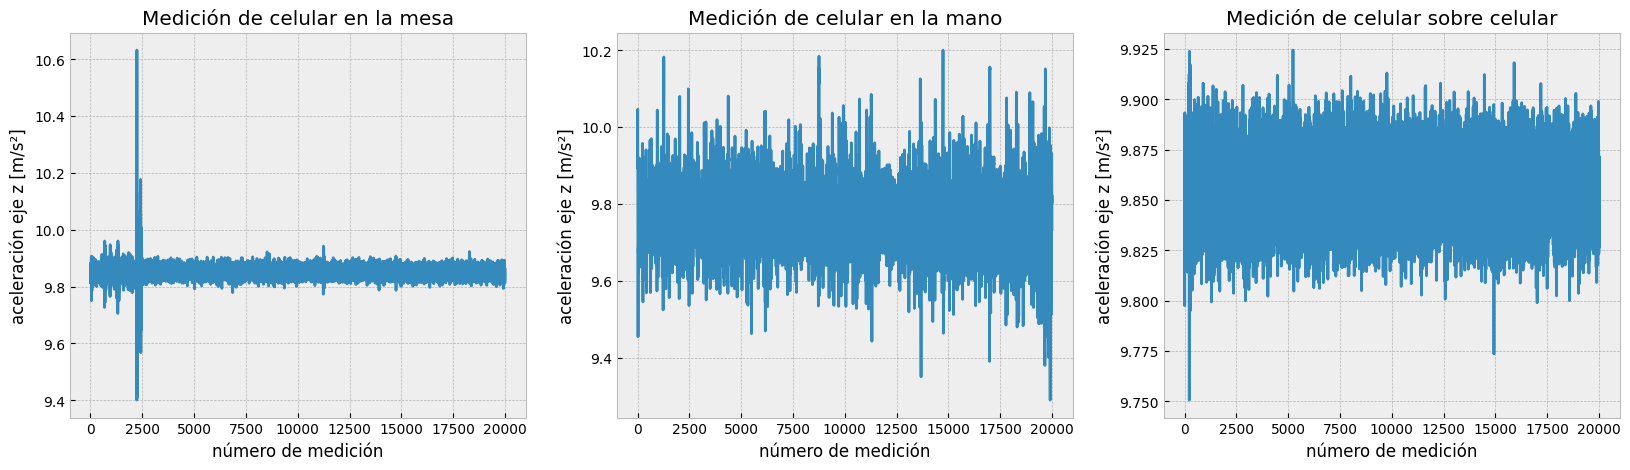

In [32]:
plt.figure(figsize=(20,5))
plt.style.use("bmh")

plt.subplot(131)
lista1 = np.arange(1, 20001)
plt.plot(lista1, dato1)
plt.xlabel("número de medición")
plt.ylabel("aceleración eje z [m/s²]")
plt.title("Medición de celular en la mesa")

plt.subplot(132)
lista2 = np.arange(1, 20001)
plt.plot(lista2, dato2)
plt.xlabel("número de medición")
plt.ylabel("aceleración eje z [m/s²]")
plt.title("Medición de celular en la mano")

plt.subplot(133)
lista3 = np.arange(1, 20001)
plt.plot(lista3, dato3)
plt.xlabel("número de medición")
plt.ylabel("aceleración eje z [m/s²]")
plt.title("Medición de celular sobre celular")





Notemos que, la primera gráfica posee datos alterados. Por ende, es necesario eliminarlos. \
A continuación se muestra la nueva gráfica.

Text(0.5, 1.0, 'Medición de celular en la mesa')

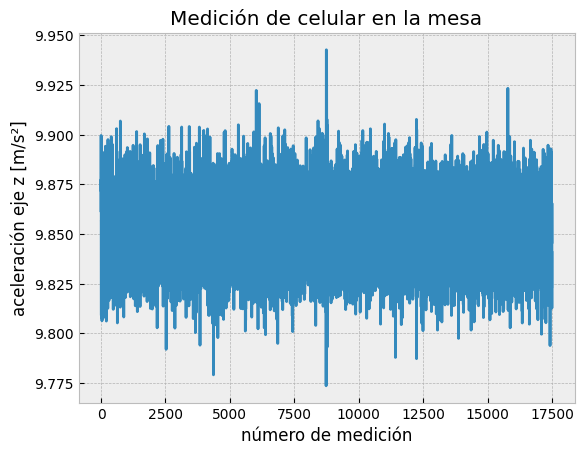

In [33]:
dato1 = np.genfromtxt("celular-mesa.csv", usecols= 3, skip_footer=52085, skip_header=2500)

lista1 = np.arange(1, 17501)
plt.plot(lista1, dato1)
plt.xlabel("número de medición")
plt.ylabel("aceleración eje z [m/s²]")
plt.title("Medición de celular en la mesa")



- Segundo, calculamos el promedio y la desviación estándar de los datos que vamos a utilizar.

In [34]:
promd1 = np.mean(dato1)
promd2 = np.mean(dato2)
promd3 = np.mean(dato3)

print("Promedio 1: ",promd1)
print("Promedio 2: ",promd2)
print("Promedio 3: ",promd3)


Promedio 1:  9.85240257279086
Promedio 2:  9.7614086608379
Promedio 3:  9.8561285145804


In [35]:
desv1 = np.std(dato1)
desv2 = np.std(dato2)
desv3 = np.std(dato3)

print("Desviación Estándar 1: ",desv1)
print("Desviación Estándar 2: ",desv2)
print("Desviación Estándar 3: ",desv3)

Desviación Estándar 1:  0.01632468044727176
Desviación Estándar 2:  0.09635489791974478
Desviación Estándar 3:  0.01611173829466948


- Tercero, confeccionaremos un gráfico que señale la cantidad de veces que se repite el dato de la aceleración

Text(0.5, 1.0, 'Medición de celular sobre celular')

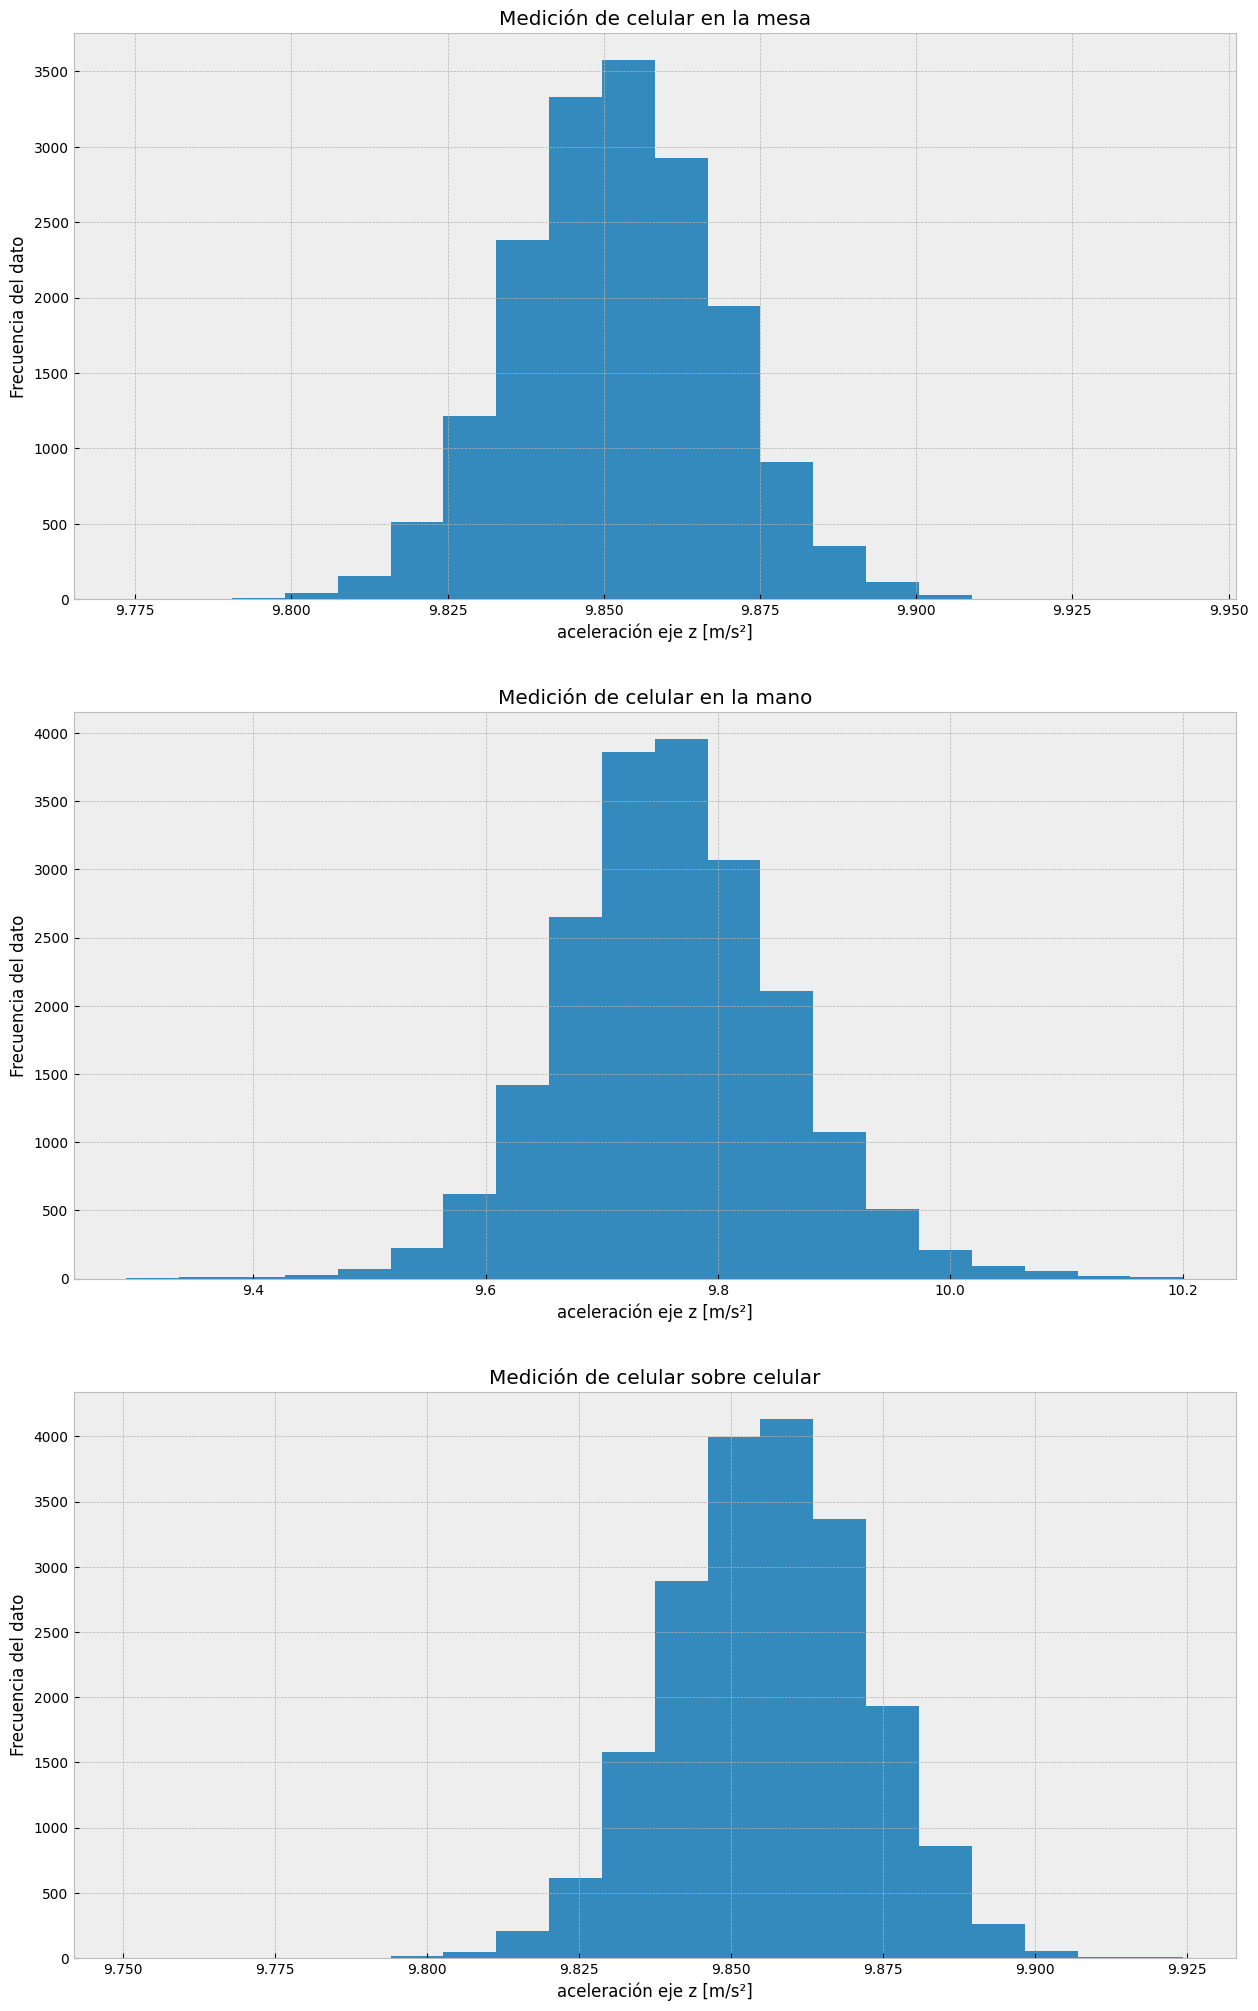

In [36]:
plt.figure(figsize=(15,25))


plt.subplot(311)
plt.hist(dato1, bins=20)
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")
plt.title("Medición de celular en la mesa")

plt.subplot(312)
plt.hist(dato2, bins=20)
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")
plt.title("Medición de celular en la mano")

plt.subplot(313)
plt.hist(dato3, bins=20)
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")
plt.title("Medición de celular sobre celular")

Este gráfico calcula y grafica el conteo de repeticiones de valores de $a_z$ en el intervalo $[9.7,9.9]$ mediante un histograma que 20 divisiones, en el, se aprecia que la distribución de frecuencias es bastante simétrica, y que los valores más repetidos coinciden aproximadamente con el valor del promedio antes calculado.

Al observar esta figura, se deduce que una posible curva ajustada es dada por la función trigonométrica la exponencial y debe ser de la forma $f(x)=A \times exp(-B  \times x)$, en donde A, B  son parámetros que pueden ser determinados, esto porque se asemeja a una campana gausssian que sigue la ecuación $D_g=a \times exp(-\frac{(x-b)^2}{2c^2})$, que es similar a la expresión f(x) que dijimos.

- Cuarto, realizamos un ajuste de los datos del histograma.

In [37]:
from scipy.optimize import leastsq 

In [43]:


y1, x1 = np.histogram(dato1, bins=20)
x1_1 = (x1[1:]+x1[:-1])/2
x1_2 = np.linspace(x1_1[1], x1_1[-1], 100)



y2, x2 = np.histogram(dato2, bins=20)
x2_1 = (x2[1:]+x2[:-1])/2
x2_2 = np.linspace(x2_1[1], x2_1[-1], 100)

y3, x3 = np.histogram(dato3, bins=20)
x3_1 = (x3[1:]+x3[:-1])/2
x3_2 = np.linspace(x3_1[1], x3_1[-1], 100)


def gausiana1(p,x):
    return (p[2]*np.exp((-(x - p[1])**2)/(2*p[0]**2)))


def res(p,x, y):
    return y - gausiana1(p,x)



Text(0.5, 1.0, 'Datos del celular sobre el celular')

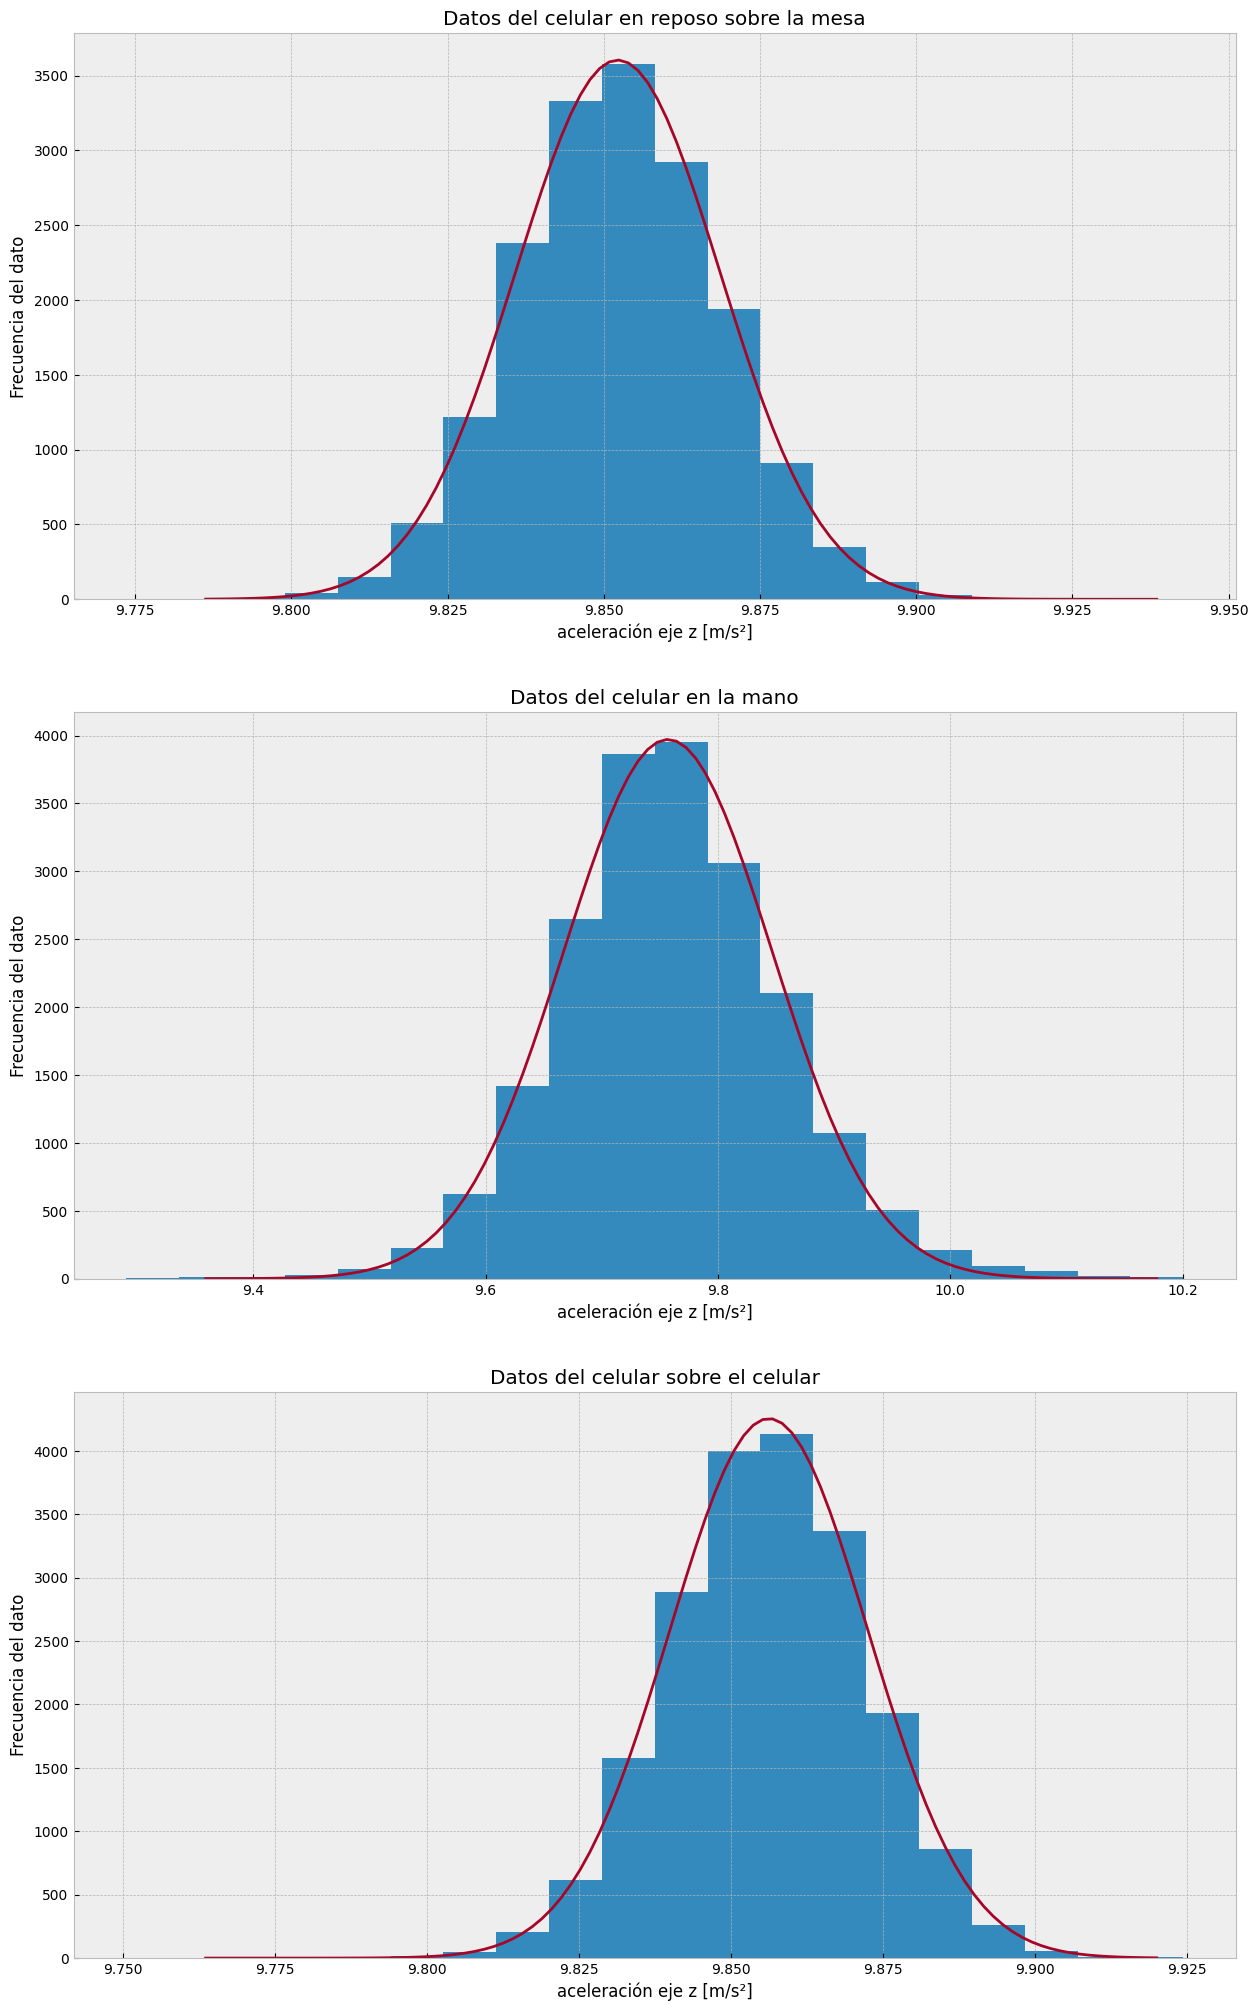

In [39]:
plt.figure(figsize=(15,25))

"""Ajuste 1"""
plt.subplot(311)
p_init1 = [desv1, promd1,3500]
p_opt1 = leastsq(res, p_init1, args=(x1_1, y1))[0]

plt.hist(dato1, bins=20)
plt.plot(x1_2, gausiana1(p_opt1,x1_2))
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")

plt.title("Datos del celular en reposo sobre la mesa")

########################################################################
"""Ajuste 2"""
plt.subplot(312)
p_init2 = [desv2, promd2, 3900]
p_opt2 = leastsq(res, p_init2, args=(x2_1, y2))[0]

plt.hist(dato2, bins=20)
plt.plot(x2_2, gausiana1(p_opt2,x2_2))
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")
plt.title("Datos del celular en la mano")

#########################################################################
"""Ajuste 3"""
plt.subplot(313)
p_init3 = [desv3, promd3, 4004]
p_opt3 = leastsq(res, p_init3, args=(x3_1, y3))[0]

plt.hist(dato3, bins=20)
plt.plot(x3_2, gausiana1(p_opt3,x3_2))
plt.xlabel("aceleración eje z [m/s²]")
plt.ylabel("Frecuencia del dato")
plt.title("Datos del celular sobre el celular")



- Quinto, realizamos un análisis de los residuos del ajuste.

Residuos del primer ajuste:

coeficientes de determinacion= 0.9996253881146592
valor se St= 29276642.0
valor de Sr= 10967.378056069248


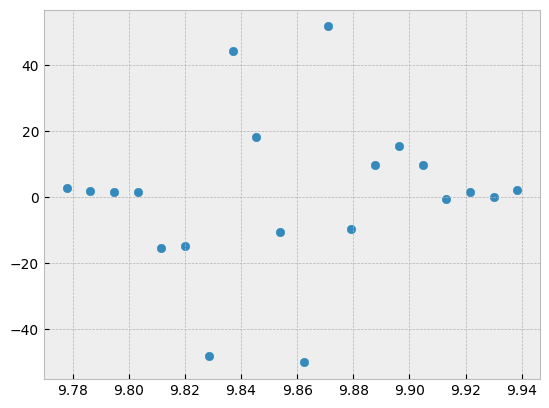

In [40]:
St = np.sum((y1 - np.mean(y1))**2) 
Sr = np.sum(res(p_opt1,x1_1,y1)**2)
r2 = (St -Sr)/(St)
print("coeficientes de determinacion=", r2)
print("valor se St=",St)
print("valor de Sr=",Sr)
plt.scatter(x1_1,res(p_opt1,x1_1,y1))

Vemos que $r_2$ es casi $1$.  \
Además los datos estan dispersos y no muestran ningún patrón, por lo que hicimos un buen ajuste.

Residuos del segundo ajuste:

coeficientes de determinacion= 0.996999793306578
valor se St= 35308924.0
valor de Sr= 105934.07012232984


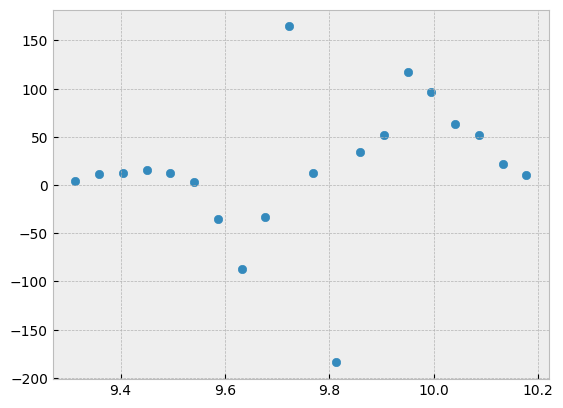

In [41]:
St = np.sum((y2 - np.mean(y2))**2)
#res =  
Sr = np.sum(res(p_opt2,x2_1,y2)**2)
r2 = (St -Sr)/(St)
print("coeficientes de determinacion=", r2)
print("valor se St=",St)
print("valor de Sr=",Sr)
plt.scatter(x2_1,res(p_opt2,x2_1,y2))

Vemos que $r_2$ es casi $1$.  \
Además los datos estan dispersos y no muestran ningún patrón, por lo que hicimos un buen ajuste.

Residuos del tercer ajuste:

coeficientes de determinacion= 0.9997335571900168
valor se St= 40271208.0
valor de Sr= 10729.973820939096


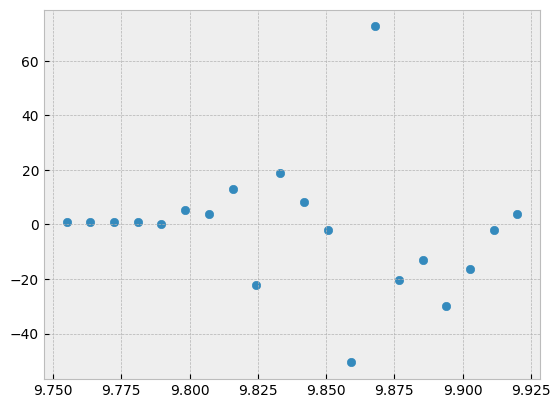

In [42]:
St = np.sum((y3 - np.mean(y3))**2)
#res =  
Sr = np.sum(res(p_opt3,x3_1,y3)**2)
r2 = (St -Sr)/(St)
print("coeficientes de determinacion=", r2)
print("valor se St=",St)
print("valor de Sr=",Sr)
plt.scatter(x3_1,res(p_opt3,x3_1,y3))

Vemos que $r_2$ es casi $1$.  \
Además los datos estan dispersos y no muestran ningún patrón, por lo que hicimos un buen ajuste.